# Data Understanding

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def analyze_images(folder_path):
    image_info = []

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.JPG')):
            file_path = os.path.join(folder_path, filename)
            
            # Get file format and size
            format = filename.split('.')[-1].lower()
            file_size = os.path.getsize(file_path) / (1024 * 1024)  # Size in MB
            
            # Read image
            img = cv2.imread(file_path)
            height, width = img.shape[:2]
            
            # Calculate average brightness
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            avg_brightness = np.mean(gray)
            
            # Detect blur
            laplacian_var = cv2.Laplacian(gray, cv2.CV_64F).var()
            
            image_info.append({
                'filename': filename,
                'format': format,
                'size_mb': file_size,
                'width': width,
                'height': height,
                'aspect_ratio': width / height,
                'avg_brightness': avg_brightness,
                'blur_score': laplacian_var
            })
    
    return pd.DataFrame(image_info)

In [13]:
def plot_analysis(df):
    # Set style for better-looking plots
    sns.set_style("whitegrid")
    
    # Histogram and Box plot for brightness
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    sns.histplot(data=df, x='avg_brightness', kde=True, ax=ax1)
    ax1.set_title('Histogram of Average Brightness')
    ax1.set_xlabel('Brightness')
    
    sns.boxplot(y='avg_brightness', data=df, ax=ax2)
    ax2.set_title('Box Plot of Average Brightness')
    ax2.set_ylabel('Brightness')
    
    plt.tight_layout()
    plt.show()
    
    # Histogram and Box plot for blur score
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    sns.histplot(data=df, x='blur_score', kde=True, ax=ax1)
    ax1.set_title('Histogram of Blur Score')
    ax1.set_xlabel('Blur Score')
    
    sns.boxplot(y='blur_score', data=df, ax=ax2)
    ax2.set_title('Box Plot of Blur Score')
    ax2.set_ylabel('Blur Score')
    
    plt.tight_layout()
    plt.show()

In [4]:
# Usage
folder_path = 'data/images'
df_images = analyze_images(folder_path)

In [5]:
# Display the first few rows of the DataFrame
df_images.head()

,filename,format,size_mb,width,height,aspect_ratio,avg_brightness,blur_score
0,DSC00914.JPG,jpg,3.428555,4896,3672,1.333333,100.339086,21.942084
1,DSC00915.JPG,jpg,3.391055,4896,3672,1.333333,111.852746,19.432802
2,DSC00916.JPG,jpg,3.945054,4896,3672,1.333333,101.305568,31.125032
3,DSC00917.JPG,jpg,3.657132,4896,3672,1.333333,105.278946,23.204924
4,DSC00918.JPG,jpg,3.476072,4896,3672,1.333333,100.038606,19.325682


In [6]:
# Print summary statistics
print("\nSummary Statistics:")
df_images.describe()


Summary Statistics:


,size_mb,width,height,aspect_ratio,avg_brightness,blur_score
count,696.000000,696.000000,696.000000,696.000000,696.000000,696.000000
mean,3.946793,4876.689655,3662.666667,1.329981,105.954750,40.023376
std,0.555988,254.170591,122.849119,0.044127,7.002168,21.931373
min,0.227941,1536.000000,2048.000000,0.750000,78.710955,7.886856
25%,3.658648,4896.000000,3672.000000,1.333333,101.830796,24.251441
50%,3.849398,4896.000000,3672.000000,1.333333,105.848059,31.231118
75%,4.332464,4896.000000,3672.000000,1.333333,109.000716,56.923495
max,6.255885,4896.000000,3672.000000,1.333333,164.881937,160.003829


In [7]:
# Print format distribution
print("\nFormat Distribution:")
df_images['format'].value_counts()


Format Distribution:


format
jpg    696
Name: count, dtype: int64

d:\Software\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


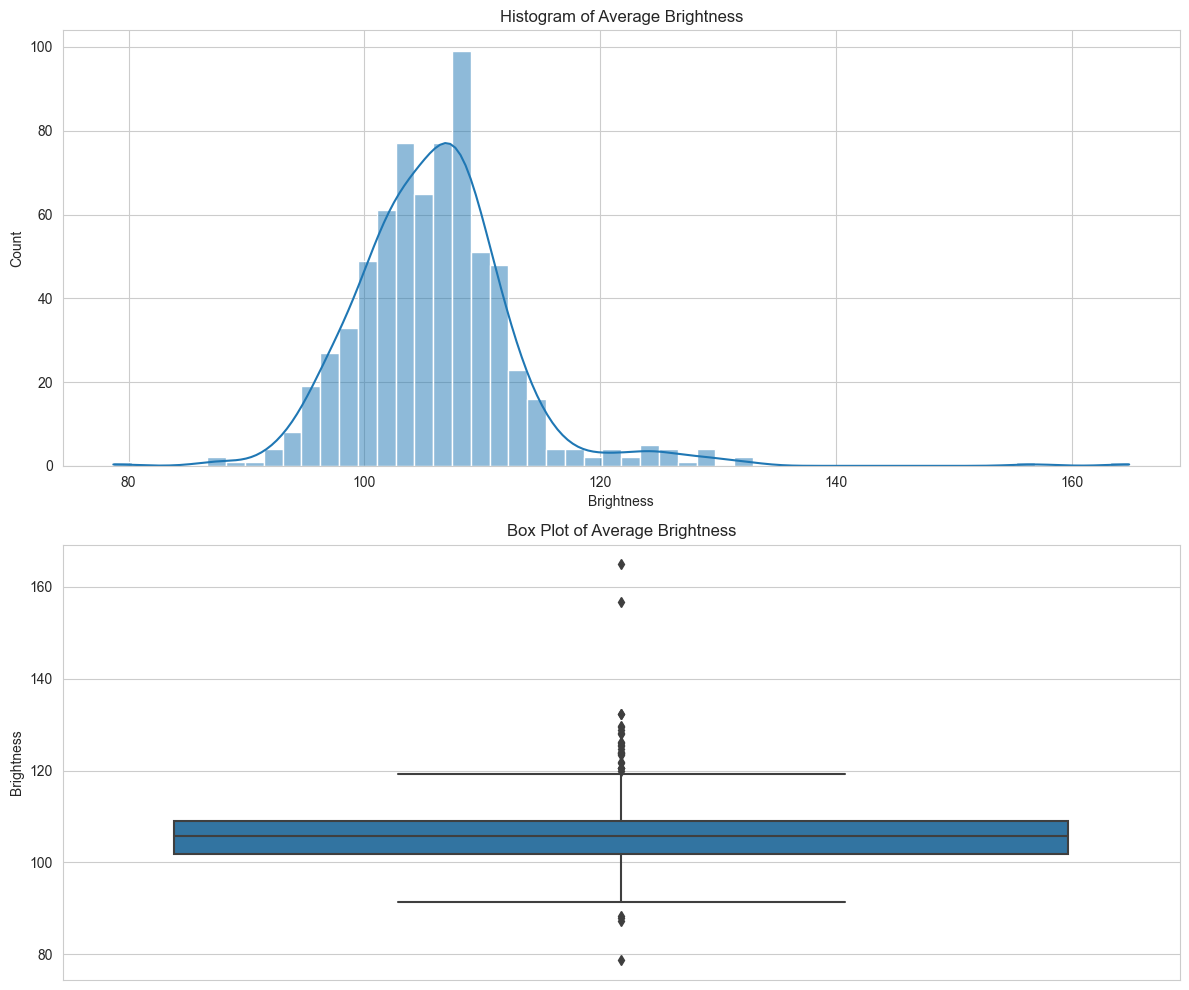

d:\Software\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


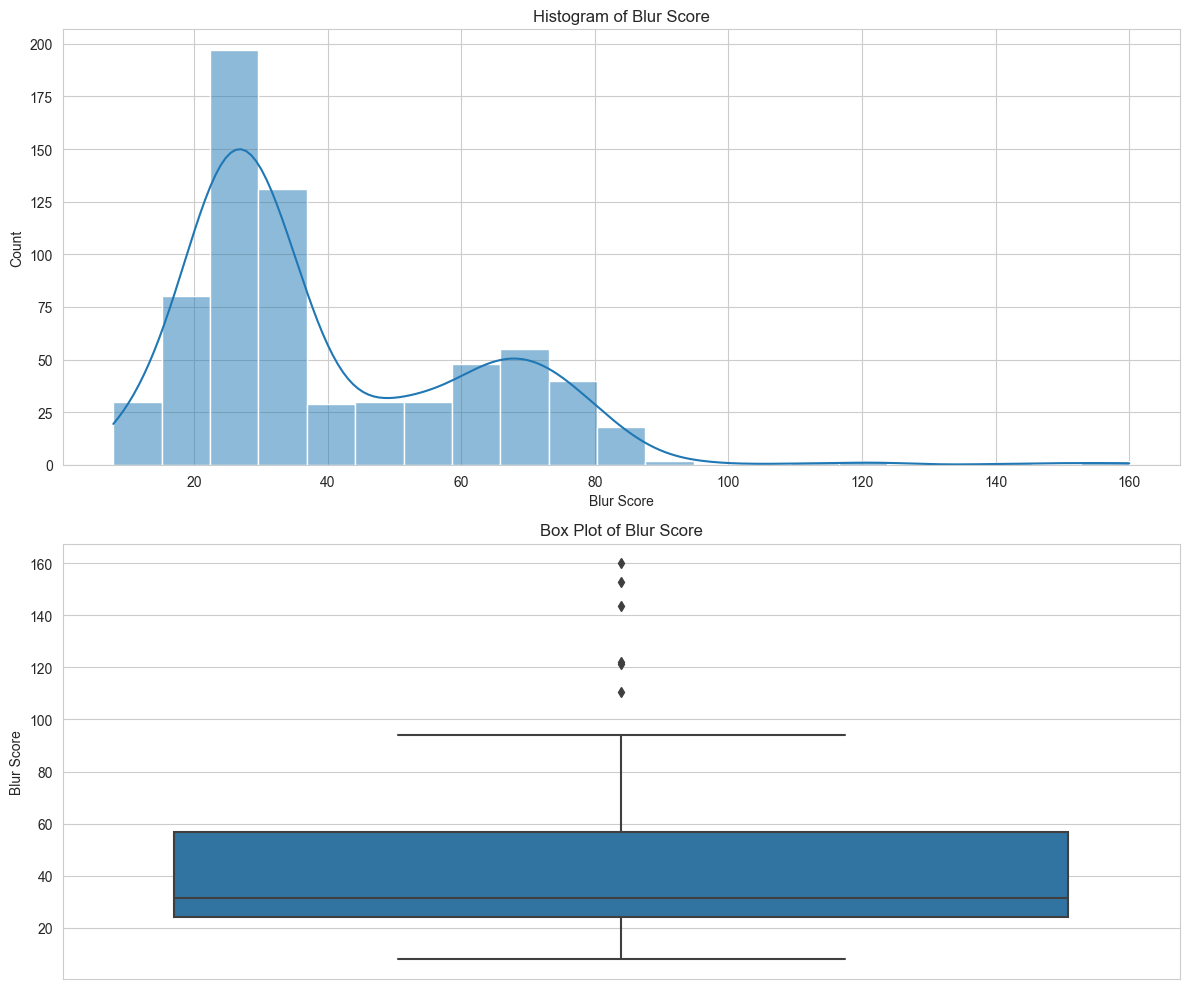

In [14]:
# Plot analysis
plot_analysis(df_images)

In [16]:
df_images.to_csv('image_analysis_results.csv', index=False)